# T-plot method

The t-plot data-reduction method uses a specified thickness relation, such as those discussed in the thickness notebook, to convert $Q$ vs. $P^{rel}$ isotherm data into $Q$ vs. $t$ thickness data where $t$ is the statistical thickness of the adsorbed layer of gas.  A straight line on this t-plot is indicative of adsorption onto a featureless surface whose area remains constant as the film grows in thickness.  More precisely, the slope of the line is proporitional to the surface area which can be seen by multiplying a small increment in the thickness $\Delta t$ by the area of the surface to obtain the corresponding quantity of adsorbed gas in this increment,

$f_\rho \Delta Q = A_{ext} \Delta t$

In this exprssion, $f_\rho$ is the density conversion factor (DCF) which is a dimensionless number which converts a volume of analysis gas at standard temperature and pressure to an equivalent volume in the liquid state (which the adsorbed gas is assumed to be in).   Dividing through the above expression by $\Delta t$ one obtains the desired relation between the slope of the line and the surface area.  If we measure the slope to be $m$,

$A_{ext} = f_\rho m$

where the area $A_{ext}$ is referred to as the external surface area -- the effective surface area of the sample with the micropores having already been filled.   Real materials will not obey this linear relation over the whole adsorption isotherm.  If there are any pores that are being filled during the adsorption process, then the effective surface area for the adsorbtive to adhere decreases as these pores fill, and the curve will deviate from a straight line in these regions.  The deviations from this straight line thus give information about the pores in the material.  If we extrapolate the linear region to a thickness of zero, we obtain a measure of the quantity adsorbed by these pores.  Specifically, multiplying the y-intercept by the DCF yields the Micropore volume 

$V_{micro} = Q_0 f_\rho $.

Finally, knowing the total surface area of the sample as obtaied by a BET or Langmuir analysis, we obtain the micropore surface area via

$A_{tot} \approx A_{micro} + A_{ext}$

For the below calculations, we use an implementation of the thickness equations from the [report-models-python](https://github.com/Micromeritics/report-models-python) on github from Micromeritics.

## T-plot result 1
First is an example calculation for a silica alumina reference material.  The thickness model of Harkins and Jura is used, and the BET surface area calculation is used to determine the total surface area which is input into the calculation.  The density conversion factor for nitrogen is  $f_{\rho} =$ 0.0015468.

Micropore Volume: 0.0008 cm^3/g
Micropore Area: 4.3229 m^2/g
External surface area: 206.6576 m^2/g
Total surface area (BET): 210.9805


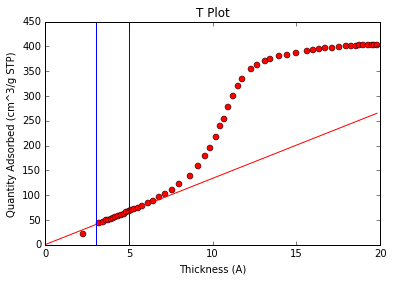

In [1]:
%matplotlib inline
import numpy as np
from micromeritics import tplot, bet, thickness, util, plots
from micromeritics import isotherm_examples as ex

sial = ex.silica_alumina()
BET_sial = bet.bet(sial.Prel, sial.Qads, Pmin = 0.05, Pmax = 0.3 , csa = 0.162)
TP_sial = tplot.tplot(sial.Prel, sial.Qads, thickness.HarkinsJura(), 
                      tmin = 3.0, tmax = 5.0, 
                      dcf = 0.0015468, sacf = 1.0, sa = BET_sial.sa )

print("Micropore Volume: %.4f cm^3/g" % TP_sial.mv)
print("Micropore Area: %.4f m^2/g" % TP_sial.ma)
print("External surface area: %.4f m^2/g" % TP_sial.ext_sa)
print("Total surface area (BET): %.4f" % TP_sial.tot_sa)

plots.plotTPlot( TP_sial )

## T-plot result 2
Next is a example calculation for carbon black using the carbon black thickess model

Micropore Volume: 0.000588 cm^3/g
Micropore Area: 1.1955 m^2/g
External surface area: 19.5094 m^2/g
Total surface area (BET): 20.7050


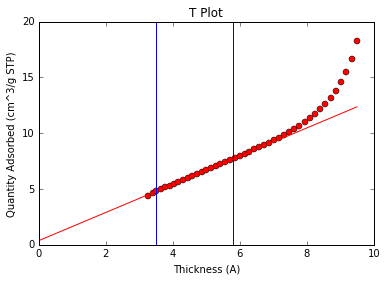

In [2]:
carb = ex.carbon_black()
BET_carb = bet.bet(carb.Prel, carb.Qads, Pmin = 0.05, Pmax = 0.3 , csa = 0.162)
TP_carb = tplot.tplot(carb.Prel, carb.Qads, thickness.CarbonBlackSTSA(), 
                      tmin = 3.5, tmax = 5.8,
                      dcf = 0.0015468, sacf = 1.0, sa = BET_carb.sa )

print("Micropore Volume: %.6f cm^3/g" % TP_carb.mv)
print("Micropore Area: %.4f m^2/g" % TP_carb.ma)
print("External surface area: %.4f m^2/g" % TP_carb.ext_sa)
print("Total surface area (BET): %.4f" % TP_carb.tot_sa)

plots.plotTPlot( TP_carb )